In [1]:
import os
import argparse
import numpy as np
import ipdb
import IPython
import yaml
from sklearn.preprocessing import normalize
import pickle as pkl
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [2]:
global CFG
with open("../../config.yaml", "r") as ymlfile:
    CFG = yaml.load(ymlfile, Loader=yaml.SafeLoader)


In [19]:
rep_type ='sk'
b_size = 64
input_type = "matMul"
load_datase = False
data_agg_type =["avg", "max", "sum"]
model_type ='disc_poly'

In [20]:
def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm


In [21]:
data = {}
for data_agg_type in data_agg_type:
    file_path = os.path.join(CFG["datadir"], "OUTPUTS_" +
                                 model_type + "_" +
                                 rep_type + "_" +
                                 data_agg_type + "_" +
                                 input_type +
                                 "_bs" + str(b_size) + ".pkl")
    with open(file_path, 'rb') as f:
        data[data_agg_type] = pkl.load(f)

In [22]:
avg_cie_cm = data["avg"]["cie"]['cm']
avg_clus_cm = data["avg"]["clus"]['cm']
avg_dpt_cm = data["avg"]["dpt"]['cm']

max_cie_cm = data["max"]["cie"]['cm']
max_clus_cm = data["max"]["clus"]['cm']
max_dpt_cm = data["max"]["dpt"]['cm']

sum_cie_cm = data["sum"]["cie"]['cm']
sum_clus_cm = data["sum"]["clus"]['cm']
sum_dpt_cm = data["sum"]["dpt"]['cm']

print(max_cie_cm.shape)
print(max_clus_cm.shape)
print(max_dpt_cm.shape)

(205, 205)
(30, 30)
(3497, 3497)


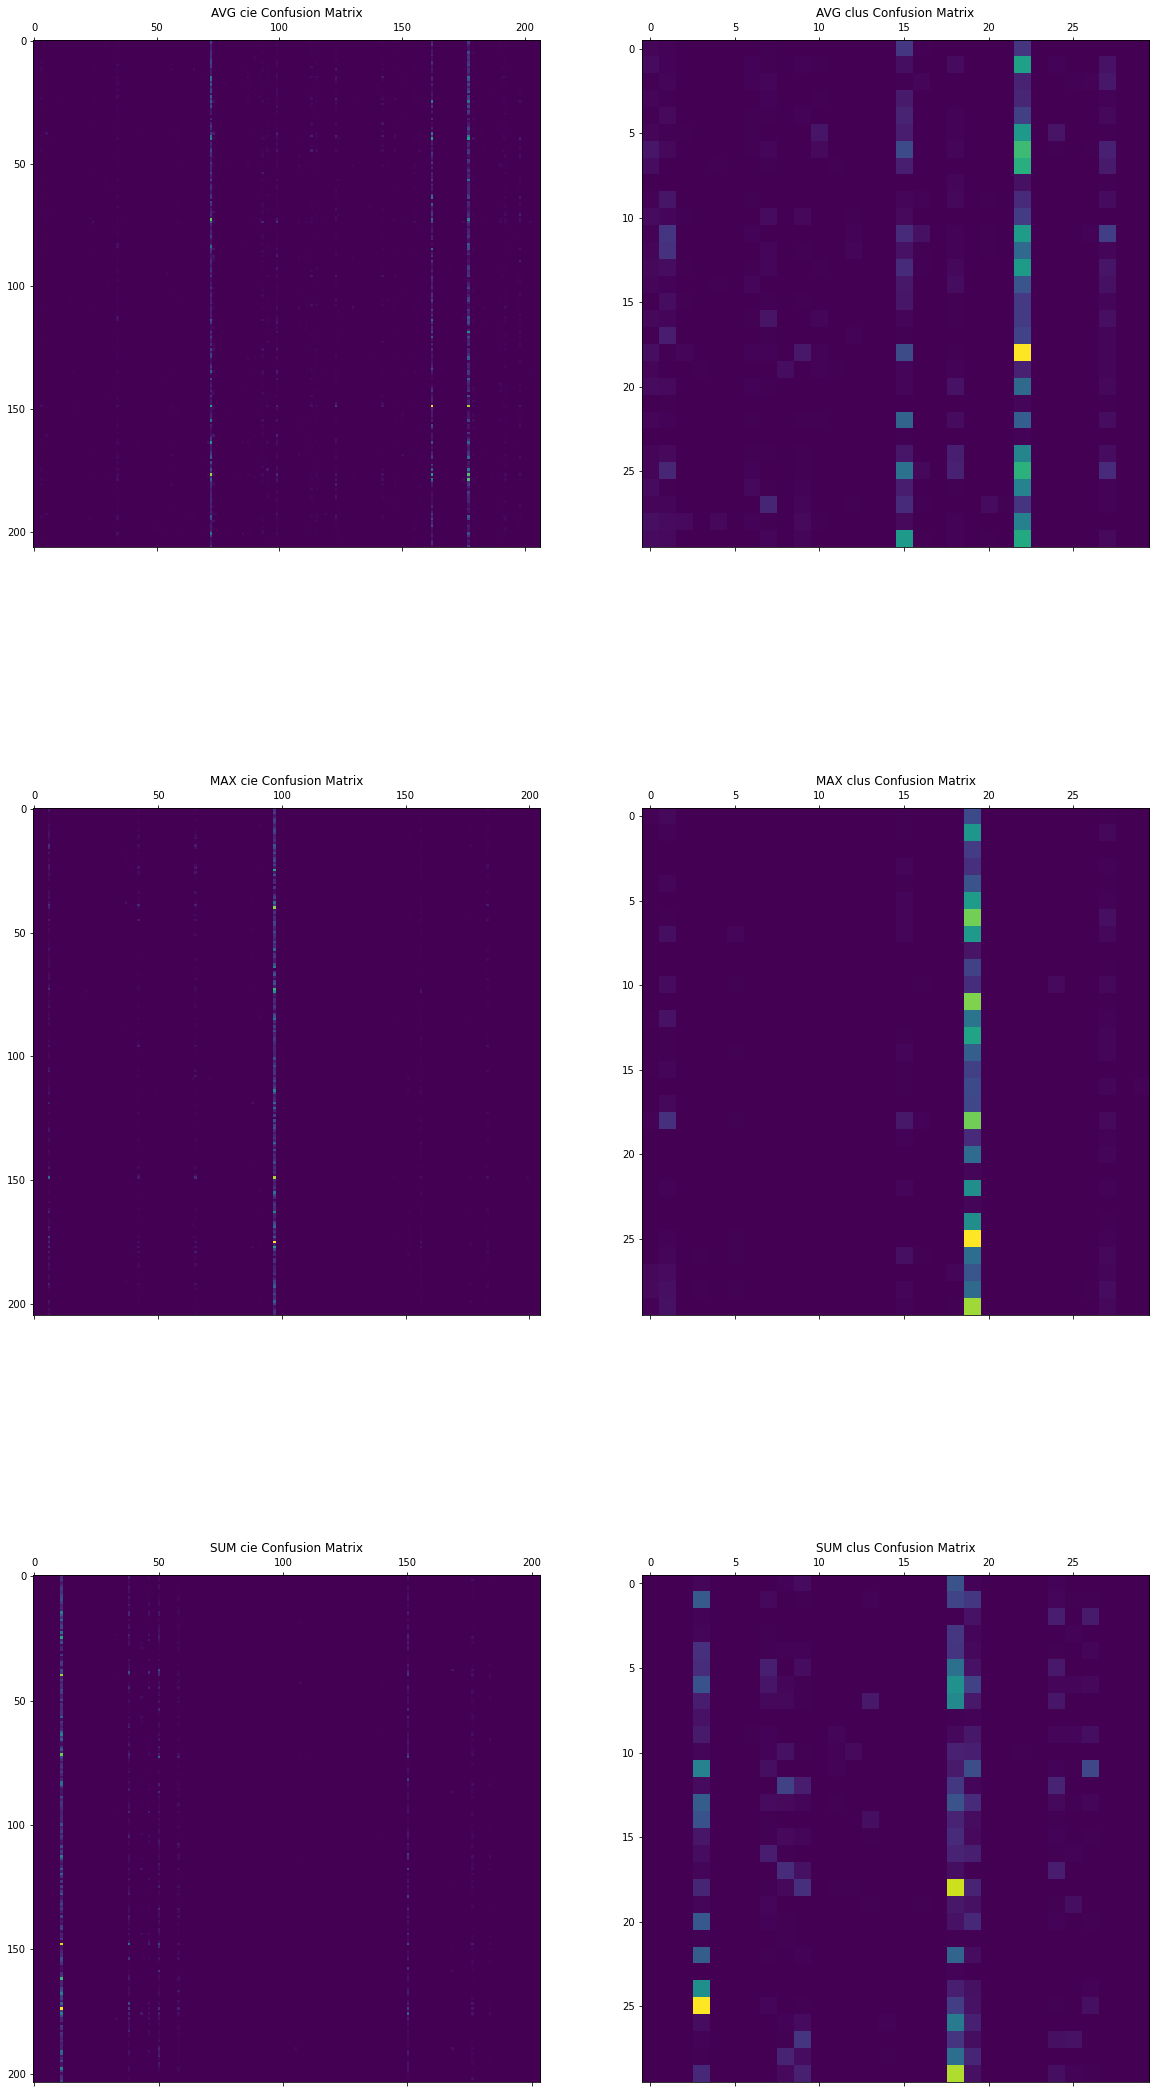

In [25]:
fig, ax = plt.subplots(3, 2, figsize=(20, 40))
cax = ax[0,0].matshow(normalize(avg_cie_cm))
ax[0,0].set_title("AVG cie Confusion Matrix")
cax = ax[0,1].matshow(normalize(avg_clus_cm))
ax[0,1].set_title("AVG clus Confusion Matrix")
# cax = ax[0,2].matshow(normalize(avg_dpt_cm))
# ax[0,2].set_title("AVG dpt Confusion Matrix")

cax = ax[1,0].matshow(normalize(max_cie_cm))
ax[1,0].set_title("MAX cie Confusion Matrix")
cax = ax[1,1].matshow(normalize(max_clus_cm))
ax[1,1].set_title("MAX clus Confusion Matrix")
# cax = ax[1,2].matshow(normalize(max_dpt_cm))
# ax[1,2].set_title("MAX dpt Confusion Matrix")

cax = ax[2,0].matshow(normalize(sum_cie_cm))
ax[2,0].set_title("SUM cie Confusion Matrix")
cax = ax[2,1].matshow(normalize(sum_clus_cm))
ax[2,1].set_title("SUM clus Confusion Matrix")
# cax = ax[2,2].matshow(normalize(sum_dpt_cm))
# ax[2,2].set_title("SUM dpt Confusion Matrix")
plt.show()

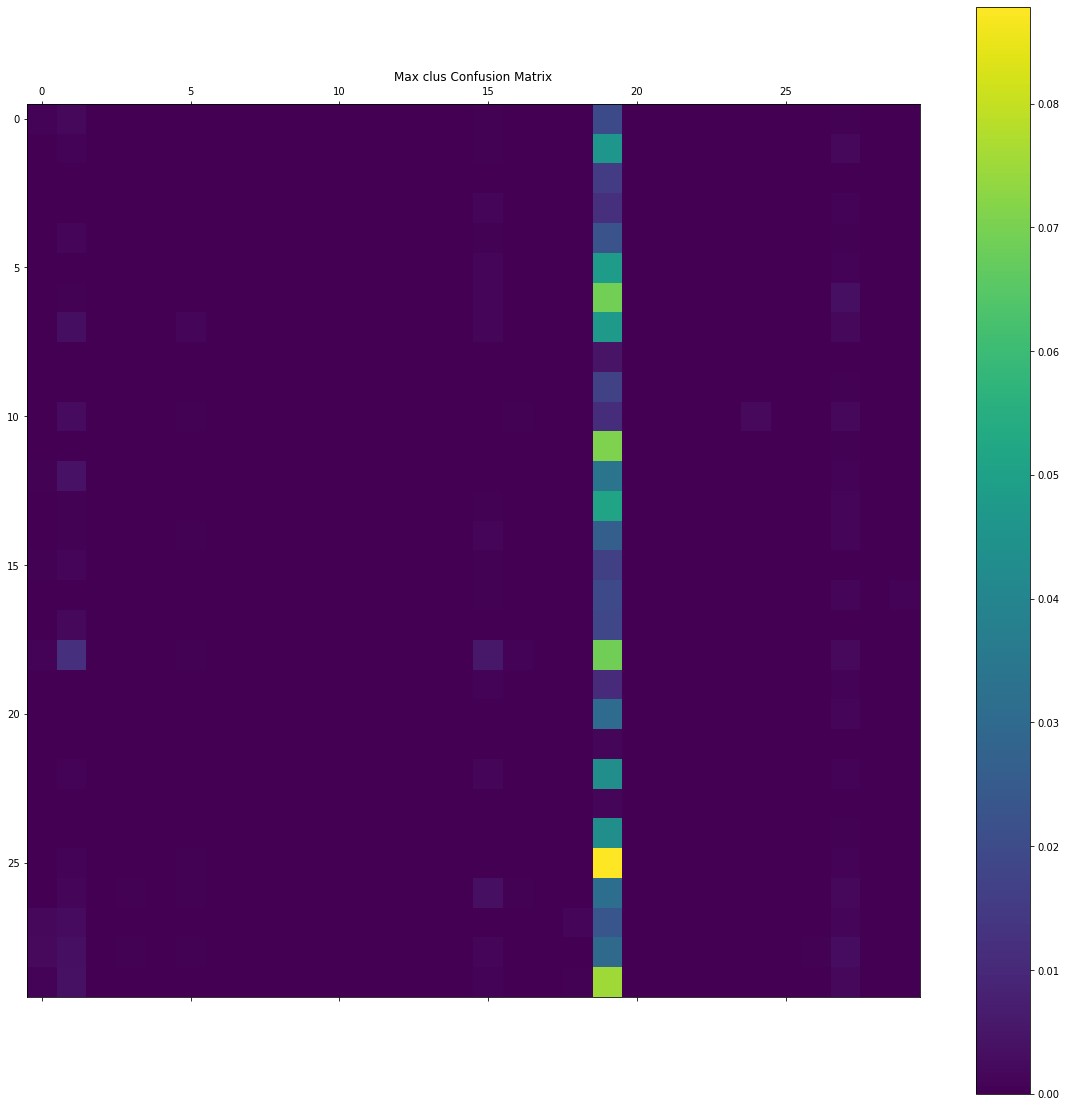

In [8]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.matshow(normalize(max_clus_cm))
fig.colorbar(cax)
ax.set_title("Max clus Confusion Matrix")
plt.show()

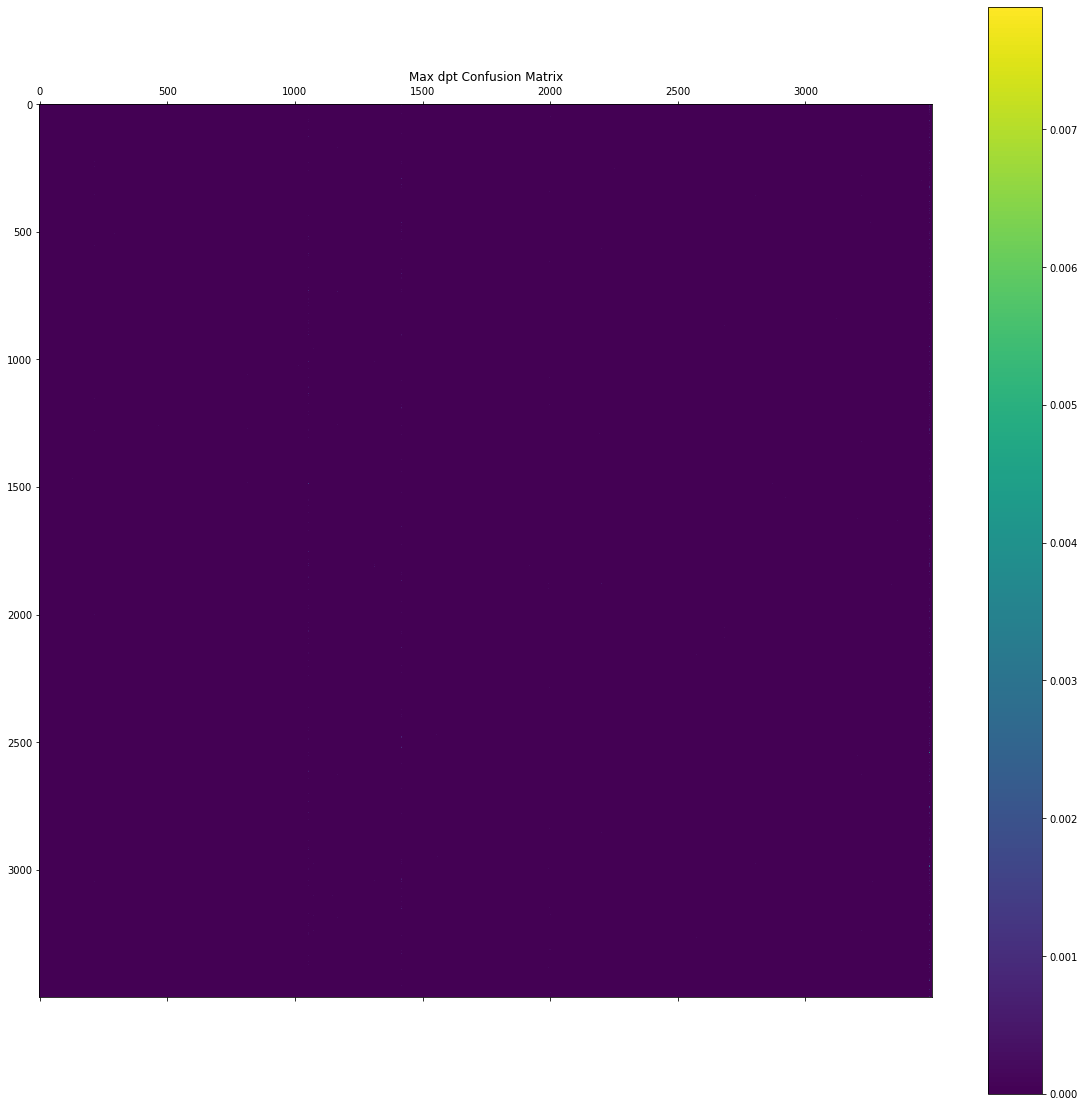

In [9]:
fig, ax = plt.subplots(figsize=(20, 20))
cax = ax.matshow(normalize(max_dpt_cm))
fig.colorbar(cax)
ax.set_title("Max dpt Confusion Matrix")
plt.show()